# Guided Project 5: Exit Surveys

Looking at the exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey

https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import numpy as np
import pandas as pd


In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')
pd.options.display.max_columns = 150 # to avoid truncated output 

dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Dete has cells labeled as "Not Stated" which should be handled as NaN values. We can re-import to handle that. 

In [3]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

print(dete_survey.info())
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [5]:
print(tafe_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

## Selecting Columns of Interest

To hone in on the the columns of interest to answer our questions, recall that factors are the duration an individual was an employee, type of departure, age of employee, and some measure of dissatisfaction or reason for resignation. In the dete survey, we have 
    -SeparationType
    -Cease Date
    -DETE Start Date
    -Role Start Date
    -Age

    Possible Measures of dissatisfaction
    -Job dissatisfaction
    -Dissatisfaction with the department
    -... several others
    
The column labeled as 'None of the above' seems to be the last in a set that all pertain to dissatisfaction so we can drop any of the columns after that one. 

In [6]:
dete_survey.columns.get_loc('None of the above')

27

In [7]:
dete_survey_selection = dete_survey.drop(dete_survey.columns[28:49], axis=1)

From Tafe: 
    -Reason for ceasing employment
    -LengthofServiceOverall. Overall Length of Service at Institute (in years) 
    -LengthofServiceCurrent. Length of Service at current workplace (in years) 
    -Current Age. Current Age
    
    Possible Measures of dissatisfaction
    -Contributing Factors. Dissatisfaction
    -Contributing Factors. Job Dissatisfaction
    -... several others
    
The 

The column labeled as 'Contributing Factors. NONE') is the last one that seems to pertain to the job dissatisfaction / contributing reasons for resigning question so we can drop all of the remaining columns. 

In [8]:
tafe_survey.columns.get_loc('Contributing Factors. NONE')

16

In [9]:
tafe_survey_selection = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [10]:
print(dete_survey_selection.columns)
print(tafe_survey_selection.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

## Re-labeling Columns

to make the columns easier to reference, and so that we can compare between the two data sets, we need to standardize the names. Dete survey is starting off with easier labels to work with so we'll clean those up then use a dictionary to match the tafe survey labels to the dete ones. 

In [11]:
dete_survey_selection.columns = map(str.lower, dete_survey_selection.columns)
print(dete_survey_selection.columns)

Index(['id', 'separationtype', 'cease date', 'dete start date',
       'role start date', 'position', 'classification', 'region',
       'business unit', 'employment status', 'career move to public sector',
       'career move to private sector', 'interpersonal conflicts',
       'job dissatisfaction', 'dissatisfaction with the department',
       'physical work environment', 'lack of recognition',
       'lack of job security', 'work location', 'employment conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill health',
       'traumatic incident', 'work life balance', 'workload',
       'none of the above', 'gender', 'age', 'aboriginal', 'torres strait',
       'south sea', 'disability', 'nesb'],
      dtype='object')


In [12]:
dete_survey_selection.columns = dete_survey_selection.columns.str.strip().str.replace(' ','_')
print(dete_survey_selection.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [13]:
dete_survey_selection.rename(columns = {'separationtype':'separation_type'}, inplace=True)
dete_survey_selection.head(2)

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [14]:
tafe_survey_selection.head(2)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
label_map = {'Record ID':'id',
             'Institute':'institue',
             'WorkArea':'business_unit',
             'CESSATION YEAR':'cease_date',
             'Reason for ceasing employment':'separation_type',
             'Gender. What is your Gender?':'gender',
             'CurrentAge. Current Age':'age',
             'Classification. Classification':'position',
             'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
             'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'workplace_service',
             'Employment Type. Employment Type':'employment_status',
            }

In [16]:
tafe_survey_selection = tafe_survey_selection.rename(label_map, axis = 1)


In [17]:
tafe_survey_selection.columns

Index(['id', 'institue', 'business_unit', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'workplace_service'],
      dtype='object')

In [18]:
tafe_survey_selection.columns = tafe_survey_selection.columns.str.replace('Contributing Factors. ','cf_')
tafe_survey_selection.columns = tafe_survey_selection.columns.str.lower().str.strip().str.replace(' - ','_').str.replace(' ','_').str.replace('-','_')


In [19]:
print(dete_survey_selection.columns)
print(tafe_survey_selection.columns)


Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')
Index(['id', 'institue', 'business_unit', 'cease_date', 'separation_type',
       'cf_career_move_public_sector', 'cf_career_move_private_sector',
       'cf_career_move_self_employment', 'cf_ill_health',
       'cf_maternity/family', 'cf_dissatisfac

## Filtering 

The questions are interested in those individuals who resigned so we can filter out the rows that are not relevant by the 'seperation_type' column in each data set. 

### Exploring Separation Type
First, we'll explore what the types are in each set as well as whether there is a significant portion of NaNs.

In [20]:
print(dete_survey_selection['separation_type'].value_counts())
print('\n',dete_survey_selection['separation_type'].isnull().value_counts())


Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separation_type, dtype: int64

 False    822
Name: separation_type, dtype: int64


In [21]:
print(tafe_survey_selection['separation_type'].value_counts())
print('\n',tafe_survey_selection['separation_type'].isnull().value_counts())

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separation_type, dtype: int64

 False    701
True       1
Name: separation_type, dtype: int64


There is only 1 null value between the sets so we'll assume we are not missing a large portion of the resignations. The dete set has 3 values that pertain to resignation:

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate 

and the tafe has the one:
Resignation

Let's start by condensing the 3 categories into the one.

In [22]:
dete_survey_selection['separation_type'] = dete_survey_selection['separation_type'].str.split('-').str[0]
dete_survey_selection['separation_type'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separation_type, dtype: int64

### Filter for Resignation Only

In [23]:
dete_resignations = dete_survey_selection[dete_survey_selection['separation_type']=='Resignation'].copy()
print(dete_resignations.shape)
tafe_resignations = tafe_survey_selection[tafe_survey_selection['separation_type']=='Resignation'].copy()
print(tafe_resignations.shape)

(311, 35)
(340, 23)


## Verify Date Data

Starting with cease_date, we'll look at value counts for any sign of logical inconsistancies

In [24]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
07/2006      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

It looks like some dates are in the format of mm/yyyy and others have only the year. We'll focus on the year in this analysis so we need to extract that from the ones with months. 

In [25]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype(float)
dete_resignations['cease_date'].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [26]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending = False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [27]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

None of the years seem to be unreasonable (outside the range of 70 years) so we can leave them be. 

Since the questions we'd like to address ask about years of service and only the tafe data set has this, we need to calculate it for the dete dataset. 

### Years of Service Calculation

In [28]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [29]:
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

In [30]:
print(tafe_resignations['institute_service'].value_counts())
tafe_resignations['institute_service'].isnull().value_counts()


Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64


False    290
True      50
Name: institute_service, dtype: int64

Looks like at some point we should choose how to group this data for comparison since the dete year of service is now listed by year and the tafe is in ranges; 1-2, 3-4, etc. 

We also are interested in job dissatisfaction though, so first lets work out what columns are of interest on that side. 

### Job Disatisfaction Calculation

In [31]:
dete_resignations.columns

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')

In [32]:
tafe_resignations.columns

Index(['id', 'institue', 'business_unit', 'cease_date', 'separation_type',
       'cf_career_move_public_sector', 'cf_career_move_private_sector',
       'cf_career_move_self_employment', 'cf_ill_health',
       'cf_maternity/family', 'cf_dissatisfaction', 'cf_job_dissatisfaction',
       'cf_interpersonal_conflict', 'cf_study', 'cf_travel', 'cf_other',
       'cf_none', 'gender', 'age', 'employment_status', 'position',
       'institute_service', 'workplace_service'],
      dtype='object')

Both data sets have a number of factors that could be understood as an indicator for dissatisfaction. For example, is the 'lack of job security' an indication of something an individual was dissatisfied by. In order to be comparable between data sets, its best to maintain a similar metric so combinging different factors in the summary metric of 'disatified' is less idea. 

Instead, we'll focus on the fields that are directly asking about dissatisfaction. 

For Dete that is:
job_disatisfaction

for Tafe that is:
cf_dissatisfaction & cf_job_dissatisfaction 

We'll need to combine the two from Tafe in a resonable way. 

In [33]:
dete_resignations['job_dissatisfaction'].value_counts()

False    270
True      41
Name: job_dissatisfaction, dtype: int64

In [34]:
dete_resignations['job_dissatisfaction'].isnull().value_counts()

False    311
Name: job_dissatisfaction, dtype: int64

Dete has a true/false field with no null values

In [35]:
tafe_resignations['cf_job_dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: cf_job_dissatisfaction, dtype: int64

In [36]:
tafe_resignations['cf_job_dissatisfaction'].isnull().value_counts()

False    332
True       8
Name: cf_job_dissatisfaction, dtype: int64

In [37]:
tafe_resignations['cf_dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: cf_dissatisfaction, dtype: int64

In [38]:
tafe_resignations['cf_dissatisfaction'].isnull().value_counts()

False    332
True       8
Name: cf_dissatisfaction, dtype: int64

tafe has two fields with either a '-' or lable to indicate it was true. There are 8 null values in each. 

In [39]:
def tafe_dissatisfaction_update(value):
    if value =='-':
        return False 
    elif pd.isnull(value):
        return False 
    else:
        return True 

tafe_resignations['dissatisfied'] = tafe_resignations[['cf_dissatisfaction', 'cf_job_dissatisfaction']].applymap(tafe_dissatisfaction_update).any(1, skipna=False)
tafe_resignations_updated = tafe_resignations.copy()

In [40]:
tafe_resignations['dissatisfied'].value_counts()

False    249
True      91
Name: dissatisfied, dtype: int64

In [48]:
dete_resignations['dissatisfied'] = dete_resignations['job_dissatisfaction']
dete_resignations_updated = dete_resignations.copy()

In [49]:
dete_resignations['dissatisfied'].value_counts()

False    270
True      41
Name: dissatisfied, dtype: int64

## Merge Datat Sets

now that both data sets have been filtered for resignation as the seperation type, and each has a service years and a dissatisfaction column, we can merge the two sets. 

Since each row still represents an individual, we want to concat the databases by adding the rows from one to the rows from the other. We'll also drop columns with many NaN values at this point.

In [85]:
tafe_resignations_updated['institute']='TAFE'
dete_resignations_updated['institute']='DETE'
dete_resignations_updated.head(2)

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,False,DETE


In [86]:
combined = pd.concat([dete_resignations_updated,tafe_resignations_updated],join='outer',axis=0,ignore_index=True)

In [87]:
print(tafe_resignations_updated.shape)
print(dete_resignations_updated.shape)
print(combined.shape)

(340, 25)
(311, 38)
(651, 52)


In [88]:
combined[['institute_service','dissatisfied']].head()

,institute_service,dissatisfied
0,7,False
1,18,False
2,3,False
3,15,True
4,3,False


In [93]:
combined_updated = combined.dropna(axis='columns', thresh=500).copy()

In [94]:
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separation_type
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation
1,41-45,2012.0,False,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation


## Cleaning the Years of Service Column

Earlier we noted that the years of service column from tate has values like:

'1-3'

and from dete:

7.0

which are now combined into one column. We'll need to organize these into the same format and will choose to bucket the data according to:

New: Less than 3 Years
Experienced: 3-6 Years
Established: 7-10 Years
Veteran: 11 or more years

In [97]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)
combined_updated['institute_service'].value_counts()

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
12.0                   6
17.0                   6
22.0                   6
10.0                   6
14.0                   6
18.0                   5
16.0                   5
23.0                   4
24.0                   4
11.0                   4
39.0                   3
19.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


In [100]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')
combined_updated['institute_service_up'].value_counts()


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [102]:
def transform_service(value):
    if pd.isnull(value):
        return np.nan
    elif value < 3:
        return 'New'
    elif value < 6:
        return 'Experienced'
    elif value < 10:
        return 'Established'
    else:
        return 'Veteran'

combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

In [103]:
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separation_type,institute_service_up,service_cat
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7.0,Teacher,Resignation,7.0,Established
1,41-45,2012.0,False,Permanent Full-time,Female,6.0,DETE,18.0,Guidance Officer,Resignation,18.0,Veteran
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3.0,Teacher,Resignation,3.0,Experienced
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15.0,Teacher Aide,Resignation,15.0,Veteran
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3.0,Teacher,Resignation,3.0,Experienced


In [107]:
combined_updated['service_cat'].value_counts()

New            193
Experienced    155
Veteran        142
Established     73
Name: service_cat, dtype: int64

## Analysis 

In [114]:
combined_updated['dissatisfied'].value_counts(dropna=False)


False    519
True     132
Name: dissatisfied, dtype: int64

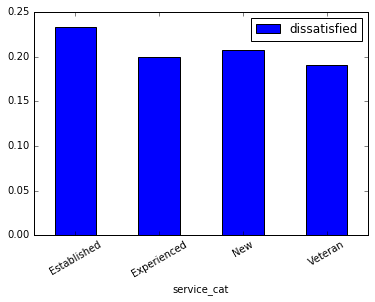

In [117]:
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
%matplotlib inline
dis_pct.plot(kind='bar', rot=30)
